<font color = green >

## Home Task: Implement K-means algorithm

</font>


<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

<font color = green >

###  Data 

</font>



In [62]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

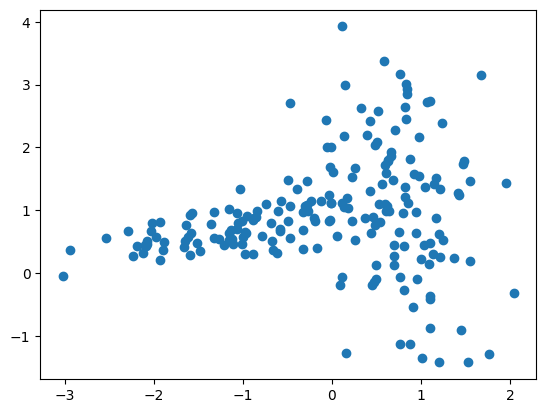

In [63]:
X, _ = make_classification(n_samples=200,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          random_state=0,
                          n_clusters_per_class=1,
                          class_sep = 0.8)
plt.figure()
plt.scatter  (X[:,0], X[:,1])

### Initialize $K$ centroids 

In [64]:
def init_centroids(amount, is_random=True, points = None, seed = 0):
    if is_random:
        np.random.seed(seed)
        return X[np.random.choice(len(points), amount)]
    else:
        centroids = np.array([(-2,2), (0,3), (1, -1), (2,3), (0,1)])
        return centroids[:amount]
    
centroids = init_centroids(4, is_random=False)

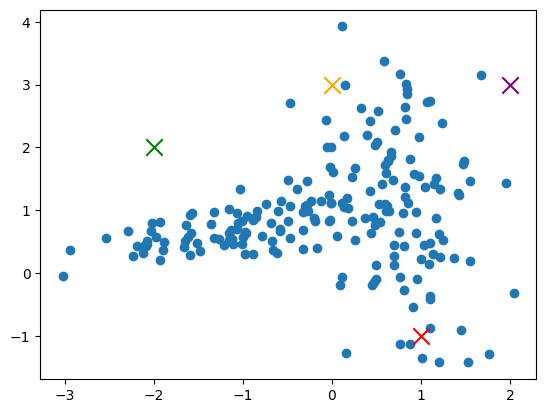

In [65]:
colors = np.array(['green', 'orange', 'red', 'purple', 'black'])
def plot_centriods(centroids):
    for i, c in enumerate (centroids):
        plt.scatter(c[0], c[1], color= colors[i], marker='x', s=140)  

def plot_X(closest_centroids = None):
    if closest_centroids is None:
        plt.scatter(X[:,0], X[:,1])
    else:
        plt.scatter(X[:,0], X[:,1], c=colors[closest_centroids])

def draw_all(centroids = None, closest_centroids = None):
    plt.figure
    plot_X(closest_centroids)
    plot_centriods(centroids)

draw_all(centroids)

### Assign every point to closest centroid 

In [66]:
points = np.array(list(zip(X[:,0], X[:,1])))
points[:5]

array([[ 0.87033369, -1.12915356],
       [-0.27565612,  1.07888341],
       [ 0.68590571,  1.4901946 ],
       [ 1.16581799,  0.87715301],
       [-1.0607126 ,  0.6950888 ]])

In [67]:
def compute_distances(samples, centroids):
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

compute_distances(points, centroids)

array([[4.24622391, 1.95494695, 2.73386009, 3.35904583, 1.60781033,
        1.19368092, 3.00516334, 1.58562253, 1.98928441, 2.40056553,
        2.2914964 , 3.60903673, 2.86954862, 2.17191647, 1.78876578,
        1.36641051, 2.05299935, 3.66040339, 1.57613743, 3.20789674,
        1.50973748, 3.40973608, 2.33680234, 2.69681744, 3.44569687,
        3.45330228, 2.10374173, 4.68134417, 1.52322847, 3.90223903,
        3.51029671, 1.60132025, 1.60222587, 1.97803083, 1.48697879,
        3.11258339, 4.91141772, 1.56116746, 1.85957021, 3.26203779,
        2.28347903, 1.79156456, 2.75422254, 4.9912084 , 2.48964256,
        1.71295547, 1.69166968, 2.12131009, 4.49997708, 2.27034045,
        3.60790188, 3.79634294, 3.4801897 , 1.54225709, 2.36876931,
        3.49456183, 1.53385112, 1.12635665, 2.62912982, 2.92688932,
        3.11421219, 1.39846653, 3.26030754, 1.1715415 , 1.66447487,
        1.95338292, 1.7811623 , 2.92636738, 1.91558125, 4.51460329,
        3.56155745, 2.00335872, 1.94155123, 4.22

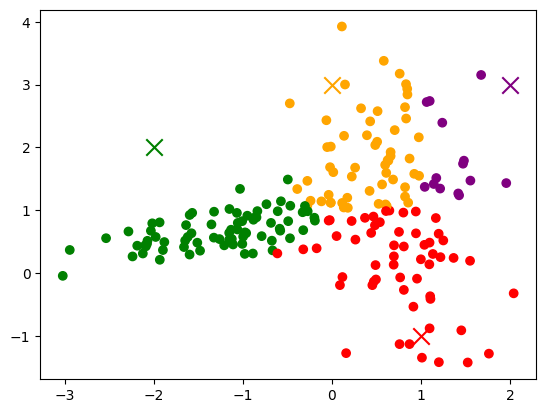

In [68]:
def compute_closest_centroids(centroids):
    all_distances = compute_distances(points, centroids)
    closest_centroids = np.apply_along_axis(np.argmin, 0, all_distances)
    return closest_centroids

closest_centroids = compute_closest_centroids(centroids)
draw_all(centroids=centroids, closest_centroids= closest_centroids)

### Compute new centroids as means of samples assigned to corresponding centroid

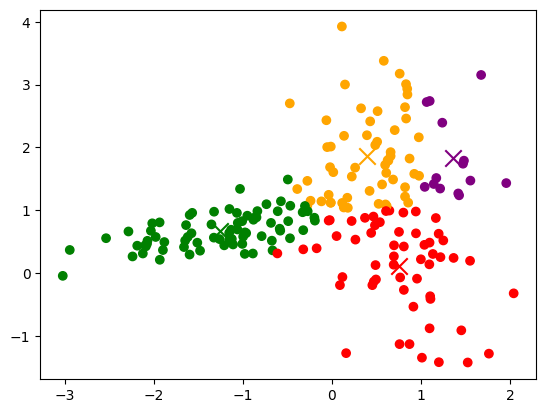

In [69]:
def compute_means(centroids, closest_centroids):     
    new_centroids= []
    for i in range (len(centroids)):
        if i not in closest_centroids:
            new_centroids.append(centroids[i])
        else: 
            new_centroid= np.mean(points[np.where(closest_centroids==i)], axis = 0)
            new_centroids.append(new_centroid)
    return new_centroids

centroids = compute_means(centroids, closest_centroids)
draw_all(centroids = centroids, closest_centroids = closest_centroids)

### Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

In [70]:
def J(centroids, closest_centroids):
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = points[np.where(closest_centroids==c_index)]
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)


closest_centroids= np.zeros(len(points), dtype=int)
print ('Cost= {}'.format(J(centroids, closest_centroids)))

Cost= 1.630360147077965


In [79]:
def run_k_means(centroids):
    is_first_time= True 
    J_hist = []
    is_to_continue = True
    
    while is_to_continue:
        closest_centroids = compute_closest_centroids(centroids) 
        centroids = compute_means( centroids , closest_centroids) 
        new_J = J(centroids, closest_centroids)                
        if is_first_time:
            J_hist.append(J(centroids, closest_centroids))            
            is_first_time= False
            continue
        if J_hist[-1] == new_J:
            is_to_continue= False
        else: 
            J_hist.append(J(centroids, closest_centroids))         

    return centroids, closest_centroids, J_hist

### Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

The best cost is J =  0.5996687153603513


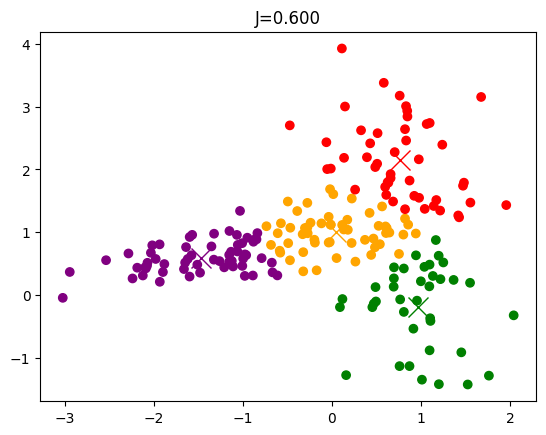

In [82]:
best_result= []

for random_iter in range (100):  
    centroids = init_centroids(amount = 4, points= points, seed = 0)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    
    if len(best_result)==0 or J_hist[-1] < best_result[2]:
        best_result= [centroids, closest_centroids, J_hist[-1]]

plt.figure()
plt.scatter(X[:,0], X[:,1], c= colors[best_result[1]])
for i, c in enumerate (best_result[0]):
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
plt.title ('J={:.3f}'.format(best_result[2]))

print('The best cost is J = ', best_result[2])